In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('Astrosat_Catalog.csv')


,ra,dec,Source_Name,SIMBAD_Name,Final_Type,Astrosat_Flag
0,8.233750,-73.805278,J0032.9-7348,RX J0032.9-7348,HMXB,0
1,11.210000,33.021389,0042+323,4U 0042+32,LMXB,0
2,12.260417,-72.847778,J0049-729,RX J0049.0-7250,HMXB,0
3,12.373333,-73.182222,J0049-732,[MA93] 300,HMXB,0
4,12.686250,-73.268056,J0050.7-7316,V* DZ Tuc,HMXB,0


In [2]:
df_hmxb=df.where(df['Final_Type']=='HMXB')
df_lmxb=df.where(df['Final_Type']=='LMXB')
df_astrosat=df.where(df['Astrosat_Flag']==1)
df_not_astrosat=df.where(df['Astrosat_Flag']==0)
df_hmxb=df_hmxb.dropna().reset_index(drop=True)
df_lmxb=df_lmxb.dropna().reset_index(drop=True)
df_astrosat=df_astrosat.dropna().reset_index(drop=True)
df_not_astrosat=df_not_astrosat.dropna().reset_index(drop=True)

In [39]:
# plt.subplot(211)
# plt.plot(df['ra'],df['dec'],'rs')
# plt.subplot(212)
# plt.plot(df_hmxb['ra'],df_hmxb['dec'],'gs')
# plt.subplot(212)
# plt.plot(df_lmxb['ra'],df_lmxb['dec'],'bs')
# plt.show()

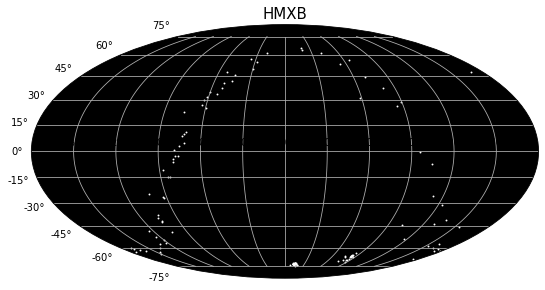

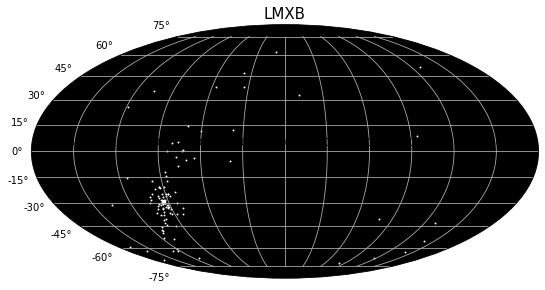

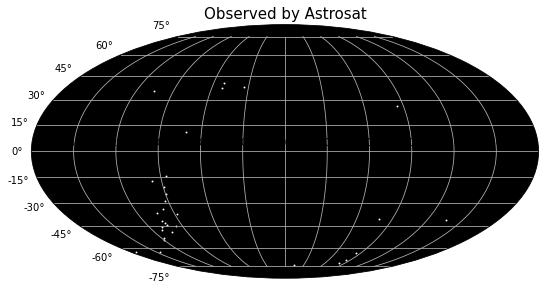

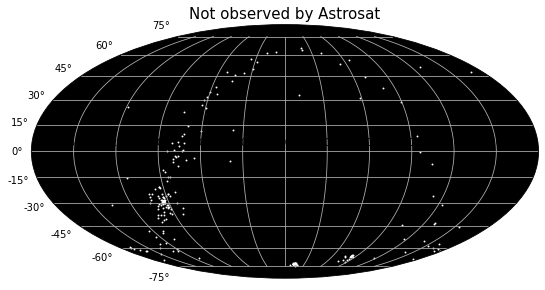

In [46]:
def mollplot(ra,dec,t):
    for i in range(len(ra)):
        if(ra[i]>180):
            ra[i]-=360
    ra=np.pi*ra/(180)
    dec=dec*np.pi/180
    fig1=plt.figure(figsize=(20,20))
    axO=fig1.add_subplot(121, projection="mollweide",facecolor='black')
    axO.scatter(ra,dec,s=0.8,c='white')
    axO.set(title=t)
    axO.grid("w--")
    axO.title.set_fontsize(15)
mollplot(df_hmxb['ra'],df_hmxb['dec'],'HMXB')
mollplot(df_lmxb['ra'],df_lmxb['dec'],'LMXB')
mollplot(df_astrosat['ra'],df_astrosat['dec'],'Observed by Astrosat')
mollplot(df_not_astrosat['ra'],df_not_astrosat['dec'],'Not observed by Astrosat')

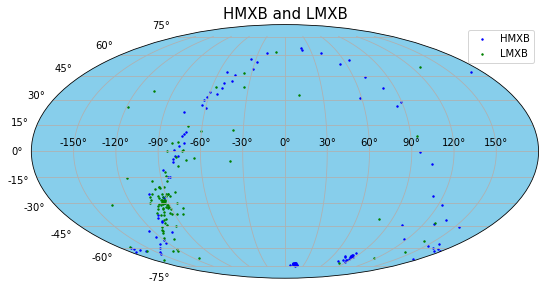

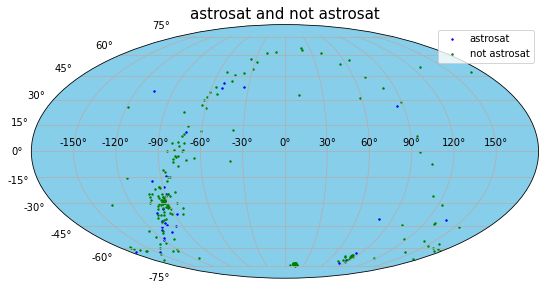

In [77]:
def mollplot2(ra1,dec1,t1,ra2,dec2,t2):
    for i in range(len(ra1)):
        if(ra1[i]>180):
            ra1[i]-=360
    for i in range(len(ra2)):
        if(ra2[i]>180):
            ra2[i]-=360
    ra1=np.pi*ra1/(180)
    dec1=dec1*np.pi/180
    ra2=np.pi*ra2/(180)
    dec2=dec2*np.pi/180
    fig1=plt.figure(figsize=(20,20))
    axO=fig1.add_subplot(121, projection="mollweide",facecolor='skyblue')
    axO.scatter(ra1,dec1,s=2,c='b',label=t1)
    axO.scatter(ra2,dec2,s=2,c='g',label=t2)
    axO.set(title=t1+' and '+t2)
    axO.grid("w--")
    axO.title.set_fontsize(15)
    axO.legend([t1,t2])
mollplot2(df_hmxb['ra'],df_hmxb['dec'],'HMXB',df_lmxb['ra'],df_lmxb['dec'],'LMXB')
mollplot2(df_astrosat['ra'],df_astrosat['dec'],'astrosat',df_not_astrosat['ra'],df_not_astrosat['dec'],'not astrosat')